In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("fiat500.csv")

In [2]:
df.describe(include='all')

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1537.000000,1538,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,lounge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,770.000000,NaN,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,443.837996,NaN,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,2.000000,NaN,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,386.000000,NaN,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,770.000000,NaN,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1154.000000,NaN,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1537 non-null   float64
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 108.3+ KB


In [4]:
df.model.unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [5]:
df.shape

(1538, 9)

In [6]:
df.previous_owners.unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
df.groupby(['model']).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1093,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [8]:
df.drop("lat", axis=1,inplace=True)

In [9]:
df.drop("lon", axis=1, inplace=True)

In [10]:
df.drop("ID", axis=1, inplace=True)

In [11]:
df

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
dummies = pd.get_dummies(df.model).astype(int)
dummies

,lounge,pop,sport
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
1533,0,0,1
1534,1,0,0
1535,0,1,0
1536,1,0,0


In [14]:
df1 = pd.concat([df, dummies.drop("sport", axis='columns')], axis="columns")
df1.head()

,model,engine_power,age_in_days,km,previous_owners,price,lounge,pop
0,lounge,51,882,25000,1,8900,1,0
1,pop,51,1186,32500,1,8800,0,1
2,sport,74,4658,142228,1,4200,0,0
3,lounge,51,2739,160000,1,6000,1,0
4,pop,73,3074,106880,1,5700,0,1


In [15]:
df2 = df1.drop("model", axis="columns")

In [16]:
df2

,engine_power,age_in_days,km,previous_owners,price,lounge,pop
0,51,882,25000,1,8900,1,0
1,51,1186,32500,1,8800,0,1
2,74,4658,142228,1,4200,0,0
3,51,2739,160000,1,6000,1,0
4,73,3074,106880,1,5700,0,1
...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0
1534,74,3835,112000,1,4600,1,0
1535,51,2223,60457,1,7500,0,1
1536,51,2557,80750,1,5990,1,0


In [88]:
X = df2.drop("price", axis="columns")
X.head()

,engine_power,age_in_days,km,previous_owners,lounge,pop
0,51,882,25000,1,1,0
1,51,1186,32500,1,0,1
2,74,4658,142228,1,0,0
3,51,2739,160000,1,1,0
4,73,3074,106880,1,0,1


In [89]:
y = df2.price
y.head()

0    8900
1    8800
2    4200
3    6000
4    5700
Name: price, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=100)

In [91]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.8691719747595805

In [92]:
ypred = lr_clf.predict(X_test)

In [93]:
ypred.shape

(308,)

In [94]:
y_test.shape

(308,)

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8691719747595805

In [96]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_value = mape(y_test, ypred)
mape_value

0.07471202375776632

In [97]:
from sklearn.metrics import mean_squared_error
t=mean_squared_error(y_test, ypred)
print(t**.5)

711.3404722042737


In [133]:
results=pd.DataFrame(columns=['Price','Predicted'])
results['Price']=y_test
results['Predicted']=ypred
results=results.reset_index()
results['id']=results.index
results.head()

,index,Price,Predicted,id
0,101,10000,10078.804192,0
1,624,5800,5248.606861,1
2,652,10850,10338.031213,2
3,1010,4600,5650.565001,3
4,728,7000,6358.208556,4


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

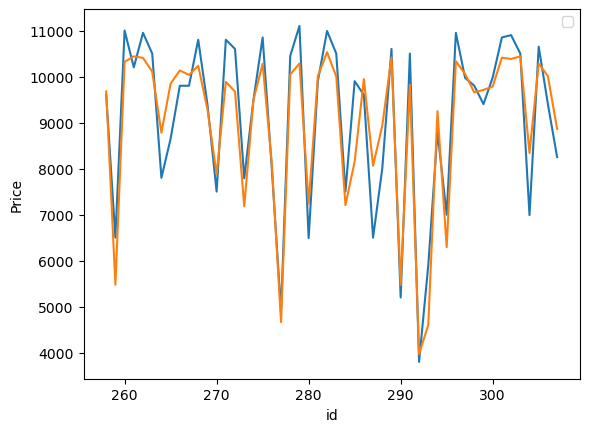

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='id',y='Price', data=results.tail(50))
sns.lineplot(x='id',y='Predicted', data=results.tail(50))
plt.plot()
plt.legend()